In [1]:
import cv2
from matplotlib import pyplot as plt
import os
import numpy as np

In [2]:
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

def plt_show0(img):
    b,g,r = cv2.split(img)
    img = cv2.merge([r, g, b])
    plt.imshow(img)
    plt.show()

def plt_show(img):
    plt.imshow(img,cmap='gray')
    plt.show()

def gray_guss(image):
    image = cv2.GaussianBlur(image, (3, 3), 0)
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return gray_image

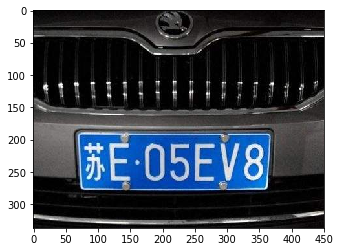

In [3]:
origin_image = cv2.imread('./image/car.jpg')
plt_show0(origin_image)

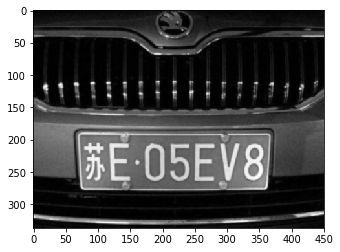

In [4]:
image = origin_image.copy()
gray_image = gray_guss(image)
plt_show(gray_image)

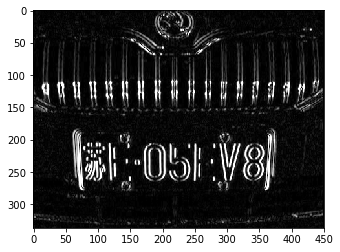

In [5]:
Sobel_x = cv2.Sobel(gray_image, cv2.CV_16S, 1, 0)
absX = cv2.convertScaleAbs(Sobel_x)
image = absX
plt_show(image)

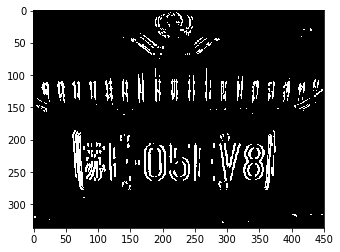

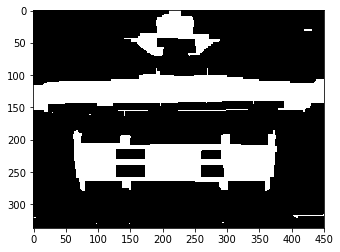

In [6]:
ret, image = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)
plt_show(image)

kernelX = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 10))
image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernelX,iterations = 1)
plt_show(image)

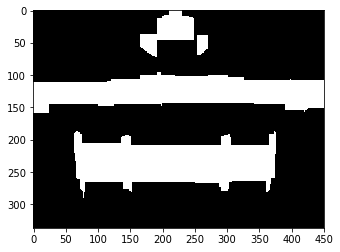

In [7]:
kernelX = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 1))
kernelY = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 20))

image = cv2.dilate(image, kernelX)
image = cv2.erode(image, kernelX)

image = cv2.erode(image, kernelY)
image = cv2.dilate(image, kernelY)
plt_show(image)

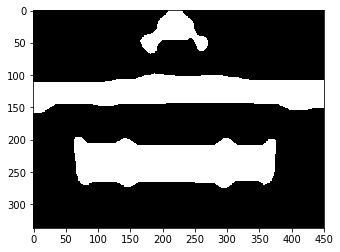

In [8]:
image = cv2.medianBlur(image, 21)
plt_show(image)

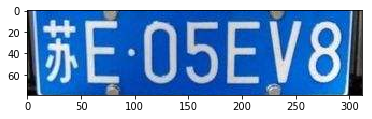

In [9]:
contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for item in contours:
    rect = cv2.boundingRect(item)
    x = rect[0]
    y = rect[1]
    weight = rect[2]
    height = rect[3]
    if (weight > (height * 3.5)) and (weight < (height * 4)):
        image = origin_image[y:y + height, x:x + weight]
        plt_show0(image)

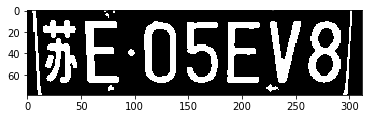

In [10]:
gray_image = gray_guss(image)   
ret, image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU)
plt_show(image)

In [11]:
area_white = 0
area_black = 0
height, width = image.shape
for i in range(height):
    for j in range(width):
        if image[i, j] == 255:
            area_white += 1
        else:
            area_black += 1
if area_white>area_black:
    ret, image = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    plt_show(image)

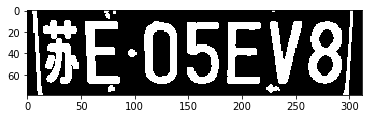

In [12]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
image = cv2.dilate(image, kernel)
plt_show(image)

In [13]:
contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
words = []
word_images = []
for item in contours:
    word = []
    rect = cv2.boundingRect(item)
    x = rect[0]
    y = rect[1]
    weight = rect[2]
    height = rect[3]
    word.append(x)
    word.append(y)
    word.append(weight)
    word.append(height)
    words.append(word)
words = sorted(words,key=lambda s:s[0],reverse=False)
i = 0
for word in words:
    if (word[3] > (word[2] * 1.5)) and (word[3] < (word[2] * 3.5)) and (word[2] > 25):
        i = i+1
        splite_image = image[word[1]:word[1] + word[3], word[0]:word[0] + word[2]]
        word_images.append(splite_image)
        print(i)
print(words)

1
2
3
4
5
6
7
[[5, 0, 10, 79], [15, 9, 33, 60], [54, 10, 33, 59], [72, 0, 5, 8], [75, 70, 7, 6], [80, 0, 3, 4], [94, 36, 8, 8], [109, 10, 31, 59], [149, 11, 30, 58], [186, 11, 32, 58], [223, 69, 13, 8], [226, 10, 30, 59], [228, 0, 3, 2], [262, 10, 31, 59], [294, 0, 10, 79]]


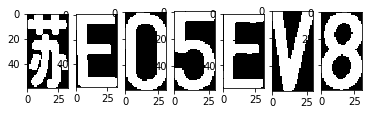

In [14]:
for i,j in enumerate(word_images):  
    plt.subplot(1,7,i+1)
    plt.imshow(word_images[i],cmap='gray')
plt.show()

In [15]:
template = ['0','1','2','3','4','5','6','7','8','9',
            'A','B','C','D','E','F','G','H','J','K','L','M','N','P','Q','R','S','T','U','V','W','X','Y','Z',
            '藏','川','鄂','甘','赣','贵','桂','黑','沪','吉','冀','津','晋','京','辽','鲁','蒙','闽','宁',
            '青','琼','陕','苏','皖','湘','新','渝','豫','粤','云','浙']


def read_directory(directory_name):
    referImg_list = []
    for filename in os.listdir(directory_name):
        referImg_list.append(directory_name + "/" + filename)
    return referImg_list


def get_chinese_words_list():
    chinese_words_list = []
    for i in range(34,64):
        c_word = read_directory('./refer1/'+ template[i])
        chinese_words_list.append(c_word)
    return chinese_words_list

chinese_words_list = get_chinese_words_list()


def get_eng_words_list():
    eng_words_list = []
    for i in range(10,34):
        e_word = read_directory('./refer1/'+ template[i])
        eng_words_list.append(e_word)
    return eng_words_list
eng_words_list = get_eng_words_list()


def get_eng_num_words_list():
    eng_num_words_list = []
    for i in range(0,34):
        word = read_directory('./refer1/'+ template[i])
        eng_num_words_list.append(word)
    return eng_num_words_list
eng_num_words_list = get_eng_num_words_list()


def template_score(template,image):
    template_img=cv2.imdecode(np.fromfile(template,dtype=np.uint8),1)
    template_img = cv2.cvtColor(template_img, cv2.COLOR_RGB2GRAY)
    ret, template_img = cv2.threshold(template_img, 0, 255, cv2.THRESH_OTSU)
    image_ = image.copy()
    height, width = image_.shape
    template_img = cv2.resize(template_img, (width, height))
    result = cv2.matchTemplate(image_, template_img, cv2.TM_CCOEFF)
    return result[0][0]

In [16]:
def template_matching(word_images):
    results = []
    for index,word_image in enumerate(word_images):
        if index==0:
            best_score = []
            for chinese_words in chinese_words_list:
                score = []
                for chinese_word in chinese_words:
                    result = template_score(chinese_word,word_image)
                    score.append(result)
                best_score.append(max(score))
            i = best_score.index(max(best_score))
            r = template[34+i]
            results.append(r)
            continue
        if index==1:
            best_score = []
            for eng_word_list in eng_words_list:
                score = []
                for eng_word in eng_word_list:
                    result = template_score(eng_word,word_image)
                    score.append(result)
                best_score.append(max(score))
            i = best_score.index(max(best_score))
            r = template[10+i]
            results.append(r)
            continue
        else:
            best_score = []
            for eng_num_word_list in eng_num_words_list:
                score = []
                for eng_num_word in eng_num_word_list:
                    result = template_score(eng_num_word,word_image)
                    score.append(result)
                best_score.append(max(score))
            i = best_score.index(max(best_score))
            r = template[i]
            results.append(r)
            continue
    return results

In [17]:
word_images_ = word_images.copy()
result = template_matching(word_images_)
print(result)

['苏', 'E', '0', '5', 'E', 'V', '8']


337
450
['苏', 'E', '0', '5', 'E', 'V', '8']
苏E05EV8


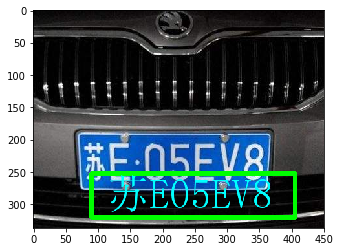

In [20]:
from PIL import ImageFont, ImageDraw, Image

height,weight = origin_image.shape[0:2]
print(height)
print(weight)

image_1 = origin_image.copy()
cv2.rectangle(image_1, (int(0.2*weight), int(0.75*height)), (int(weight*0.9), int(height*0.95)), (0, 255, 0), 5)

fontpath = "font/simsun.ttc"
font = ImageFont.truetype(fontpath,64)
img_pil = Image.fromarray(image_1)
draw = ImageDraw.Draw(img_pil)

draw.text((int(0.2*weight)+25, int(0.75*height)),  "".join(result), font = font, fill = (255, 255, 0))
bk_img = np.array(img_pil)
print(result)
print( "".join(result))
plt_show0(bk_img)